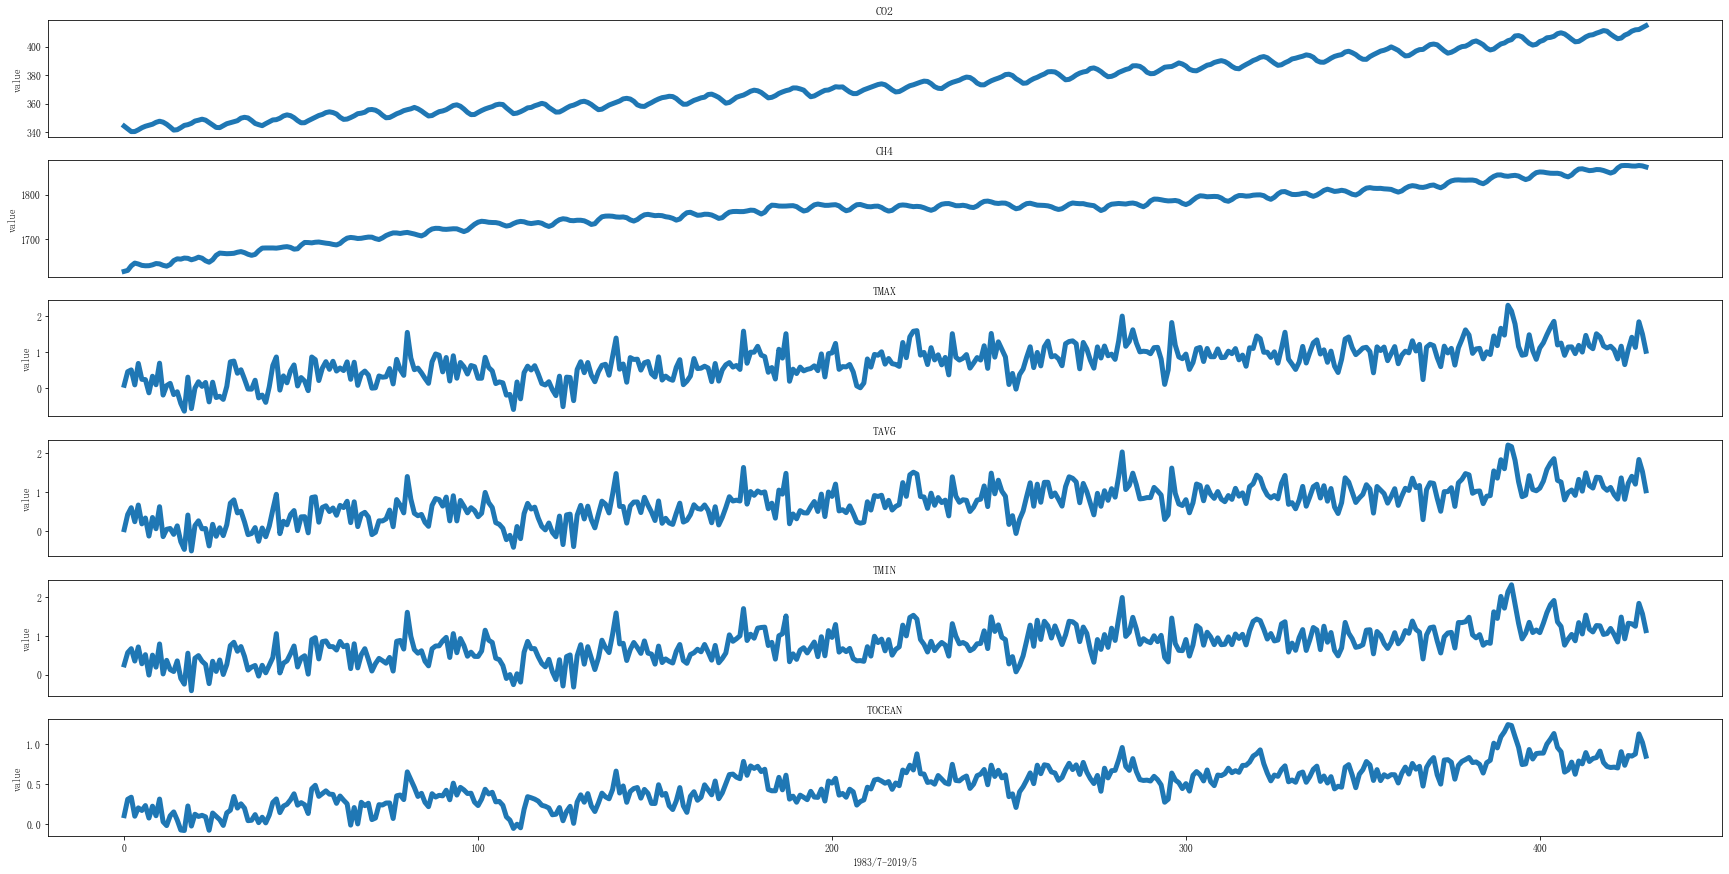

In [1]:
from pandas import read_csv
from matplotlib import pyplot
import datetime
import numpy as np
import matplotlib as mpl
import matplotlib
import matplotlib.pyplot as plt
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline
# load dataset
dataset = read_csv('data.csv', header=0)
# print(dataset.values[:,0])

# month=dataset.values[:,0]
month=list(map(str,dataset.values[:,0]))
# print(month)
# print(type(month[0]))
values = dataset.values

# specify columns to plot
groups = list(range(1,len(dataset.columns)))
i = 1
# plot each column

start = datetime.datetime(1983, 7, 1)
end = datetime.datetime(2019, 5, 1)
# 设置日期的间隔为1
delta = datetime.timedelta(days=30.4)
 
# 生成一个matplotlib可以识别的日期对象
dates = mpl.dates.drange(start, end, delta)
# print(dates)

fig= pyplot.figure(figsize = (30,15))
for group in groups:
    
    plt.subplot(len(groups),1,i)
    i=i+1
    
    if i!=len(groups)+1:
        plt.xticks([])
    else:
        plt.xlabel("1983/7-2019/5")
#         pyplot.plot(month,values[:, group])
#     else:
    pyplot.plot(values[:, group],linewidth=5)
    pyplot.title(dataset.columns[group], loc='center')
    
#     pyplot.xlabel("time")
    pyplot.ylabel("value")
#     pyplot.xticks(rotation=90,fontsize=4)

pyplot.savefig("truth.png",dpi=240)
#     pyplot.show()

In [2]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# 转换序列成监督学习问题
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
#     print(n_vars)
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

def series_to_supervised(data, n_in=1, n_out=1,y_columns=[0],dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
#     print(n_vars)
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df[y_columns].shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in y_columns]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# 加载数据集
dataset = read_csv('data.csv', header=0)
values = dataset.values[:,1:]
feature=values.shape[1]

# print(values)
# # 整数编码
# encoder = LabelEncoder()
# values[:,4] = encoder.fit_transform(values[:,4])
# # ensure all data is float
# values = values.astype('float32')

# 归一化特征
scaler = MinMaxScaler(feature_range=(0, 1,2,3,4))
scaled = scaler.fit_transform(values)
# scaled=values

# 构建监督学习问题
n_in=48
reframed = series_to_supervised(scaled, n_in, 1,y_columns=list(range(feature)))
print(reframed.head(5))
# 分割为训练集和测试集
values = reframed.values

n_train_hours = 300
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# 分为输入输出
train_X, train_y = train[:, :-feature], train[:, -feature:]
print(-values.shape[1])
test_X, test_y = test[:, :-feature], test[:, -feature:]
# 重塑成3D形状 [样例, 时间步, 特征]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

Using TensorFlow backend.


    var1(t-48)  var2(t-48)  var3(t-48)  var4(t-48)  var5(t-48)  var6(t-48)  \
48    0.051675    0.000000    0.244801    0.200890    0.243947    0.140285   
49    0.025838    0.009155    0.372656    0.344329    0.359868    0.294824   
50    0.000000    0.052018    0.389703    0.408451    0.397285    0.314329   
51    0.000404    0.078236    0.248210    0.276130    0.280264    0.135034   
52    0.016687    0.069496    0.450733    0.433655    0.413426    0.213803   

    var1(t-47)  var2(t-47)  var3(t-47)  var4(t-47)  ...  var3(t-1)  var4(t-1)  \
48    0.025838    0.009155    0.372656    0.344329  ...   0.380498   0.342476   
49    0.000000    0.052018    0.389703    0.408451  ...   0.436754   0.381394   
50    0.000404    0.078236    0.248210    0.276130  ...   0.237982   0.191994   
51    0.016687    0.069496    0.450733    0.433655  ...   0.317081   0.321720   
52    0.036334    0.056596    0.300375    0.255374  ...   0.284010   0.323573   

    var5(t-1)  var6(t-1)   var1(t)   var2(t)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 300 samples, validate on 83 samples
Epoch 1/400
 - 3s - loss: 0.4269 - val_loss: 0.5995
Epoch 2/400
 - 0s - loss: 0.3141 - val_loss: 0.3073
Epoch 3/400
 - 0s - loss: 0.1468 - val_loss: 0.1443
Epoch 4/400
 - 0s - loss: 0.1193 - val_loss: 0.2215
Epoch 5/400
 - 0s - loss: 0.1110 - val_loss: 0.2220
Epoch 6/400
 - 0s - loss: 0.0986 - val_loss: 0.1437
Epoch 7/400
 - 0s - loss: 0.0915 - val_loss: 0.1534
Epoch 8/400
 - 0s - loss: 0.0917 - val_loss: 0.1582
Epoch 9/400
 - 0s - loss: 0.0851 - val_loss: 0.1299
Epoch 10/400
 - 0s - loss: 0.0822 - val_loss: 0.1469
Epoch 11/400
 - 0s - loss: 0.0794 - val_loss: 0.1191
Epoch 12/400
 - 0s - loss: 0.0764 - val_loss: 0.1134
Epoch 13/400
 - 0s - loss: 0.0751 - val_loss: 0.0967
Epoch 14/400
 - 0s - loss: 0.0741 - val_loss: 0.1006
Epoch 15/400
 - 0s - loss: 0.0730 - val_loss: 0.0990
Epoch 16/400
 - 0s - loss: 0.0715 - val_loss: 0.0

Epoch 144/400
 - 0s - loss: 0.0510 - val_loss: 0.1038
Epoch 145/400
 - 0s - loss: 0.0507 - val_loss: 0.0882
Epoch 146/400
 - 0s - loss: 0.0456 - val_loss: 0.0830
Epoch 147/400
 - 0s - loss: 0.0458 - val_loss: 0.0805
Epoch 148/400
 - 0s - loss: 0.0461 - val_loss: 0.0821
Epoch 149/400
 - 0s - loss: 0.0456 - val_loss: 0.0792
Epoch 150/400
 - 0s - loss: 0.0464 - val_loss: 0.0805
Epoch 151/400
 - 0s - loss: 0.0464 - val_loss: 0.0973
Epoch 152/400
 - 0s - loss: 0.0471 - val_loss: 0.0991
Epoch 153/400
 - 0s - loss: 0.0438 - val_loss: 0.0878
Epoch 154/400
 - 0s - loss: 0.0442 - val_loss: 0.0887
Epoch 155/400
 - 0s - loss: 0.0429 - val_loss: 0.0939
Epoch 156/400
 - 0s - loss: 0.0422 - val_loss: 0.0860
Epoch 157/400
 - 0s - loss: 0.0428 - val_loss: 0.0855
Epoch 158/400
 - 0s - loss: 0.0423 - val_loss: 0.0886
Epoch 159/400
 - 0s - loss: 0.0421 - val_loss: 0.0852
Epoch 160/400
 - 0s - loss: 0.0432 - val_loss: 0.0832
Epoch 161/400
 - 0s - loss: 0.0454 - val_loss: 0.0769
Epoch 162/400
 - 0s - loss: 

Epoch 296/400
 - 0s - loss: 0.0323 - val_loss: 0.0961
Epoch 297/400
 - 0s - loss: 0.0303 - val_loss: 0.1047
Epoch 298/400
 - 0s - loss: 0.0292 - val_loss: 0.0942
Epoch 299/400
 - 0s - loss: 0.0306 - val_loss: 0.0977
Epoch 300/400
 - 0s - loss: 0.0305 - val_loss: 0.0807
Epoch 301/400
 - 0s - loss: 0.0313 - val_loss: 0.0900
Epoch 302/400
 - 0s - loss: 0.0301 - val_loss: 0.0816
Epoch 303/400
 - 0s - loss: 0.0299 - val_loss: 0.0906
Epoch 304/400
 - 0s - loss: 0.0347 - val_loss: 0.1036
Epoch 305/400
 - 0s - loss: 0.0336 - val_loss: 0.1085
Epoch 306/400
 - 0s - loss: 0.0337 - val_loss: 0.1057
Epoch 307/400
 - 0s - loss: 0.0317 - val_loss: 0.0972
Epoch 308/400
 - 0s - loss: 0.0288 - val_loss: 0.0931
Epoch 309/400
 - 0s - loss: 0.0282 - val_loss: 0.0972
Epoch 310/400
 - 0s - loss: 0.0283 - val_loss: 0.0947
Epoch 311/400
 - 0s - loss: 0.0276 - val_loss: 0.0864
Epoch 312/400
 - 0s - loss: 0.0296 - val_loss: 0.1105
Epoch 313/400
 - 0s - loss: 0.0313 - val_loss: 0.0992
Epoch 314/400
 - 0s - loss: 

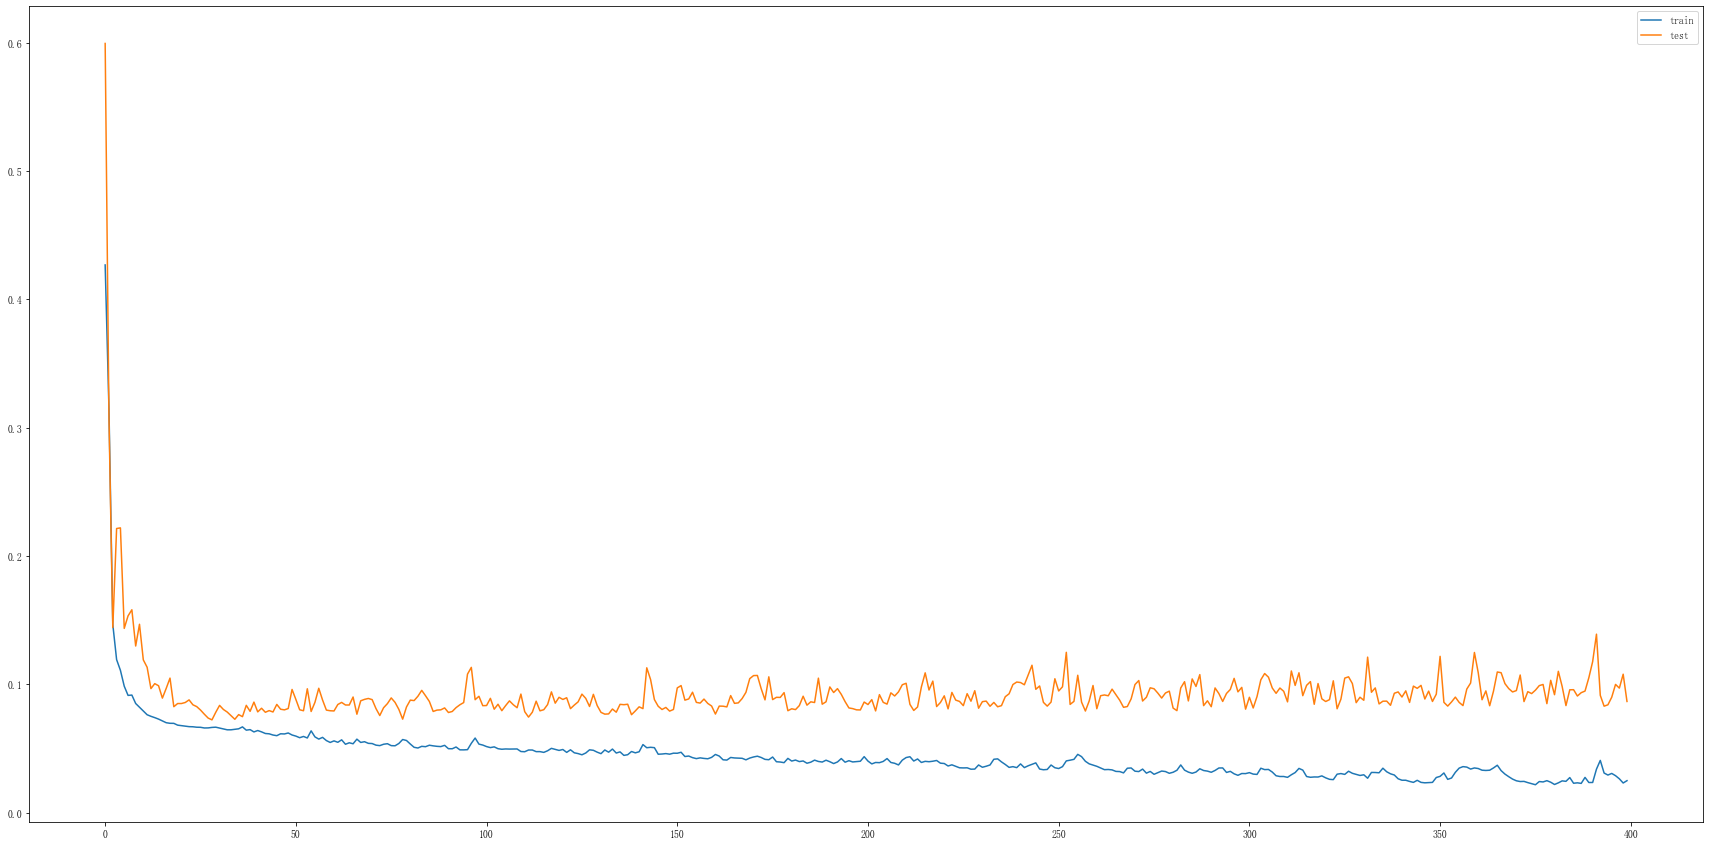

In [3]:
# 设计网络
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences=True))
model.add(LSTM(200, input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences=True))
model.add(LSTM(100,return_sequences=False))
model.add(Dense(100))
model.add(Dense(feature))
model.compile(loss='mae', optimizer='adam')
# 拟合神经网络模型
history = model.fit(train_X, train_y, epochs=400, batch_size=80, validation_data=(test_X, test_y), verbose=2, shuffle=True)

# 绘制训练测试误差图
fig= pyplot.figure(figsize = (30,15))
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
plt.savefig('loss.png')
pyplot.show()


In [4]:
# 做出预测
yhat = model.predict(test_X)

test_X1 = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# 反向转换预测值比例
# inv_yhat = concatenate((yhat, test_X1[:, 1:]), axis=1)

# inv_yhat = concatenate((yhat, test_X1[:, 2:]), axis=1)
inv_yhat=yhat
inv_yhat = scaler.inverse_transform(inv_yhat)
print(inv_yhat.shape)
# inv_yhat = inv_yhat[:,0]
# 反向转换实际值比例
test_y1 = test_y.reshape((len(test_y), len(groups)))
# inv_y = concatenate((test_y1, test_X1[:, 2:]), axis=1)
inv_y=test_y1
inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,0]


(83, 6)


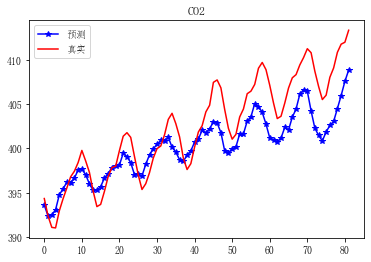

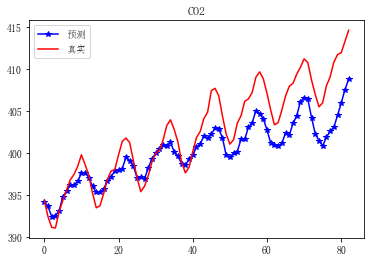

In [5]:
# 绘制历史数据和预测数据图
plt.plot(inv_yhat[1:,0],label='预测',c='b',linestyle='-', marker='*')
plt.plot(inv_y[:-1,0],label="真实",c='r')
plt.legend()
plt.title('CO2')
plt.show()


plt.plot(inv_yhat[:,0],label='预测',c='b',linestyle='-', marker='*')
plt.plot(inv_y[:,0],label="真实",c='r')
plt.legend()
plt.title('CO2')
plt.show()


Test RMSE: 3.315


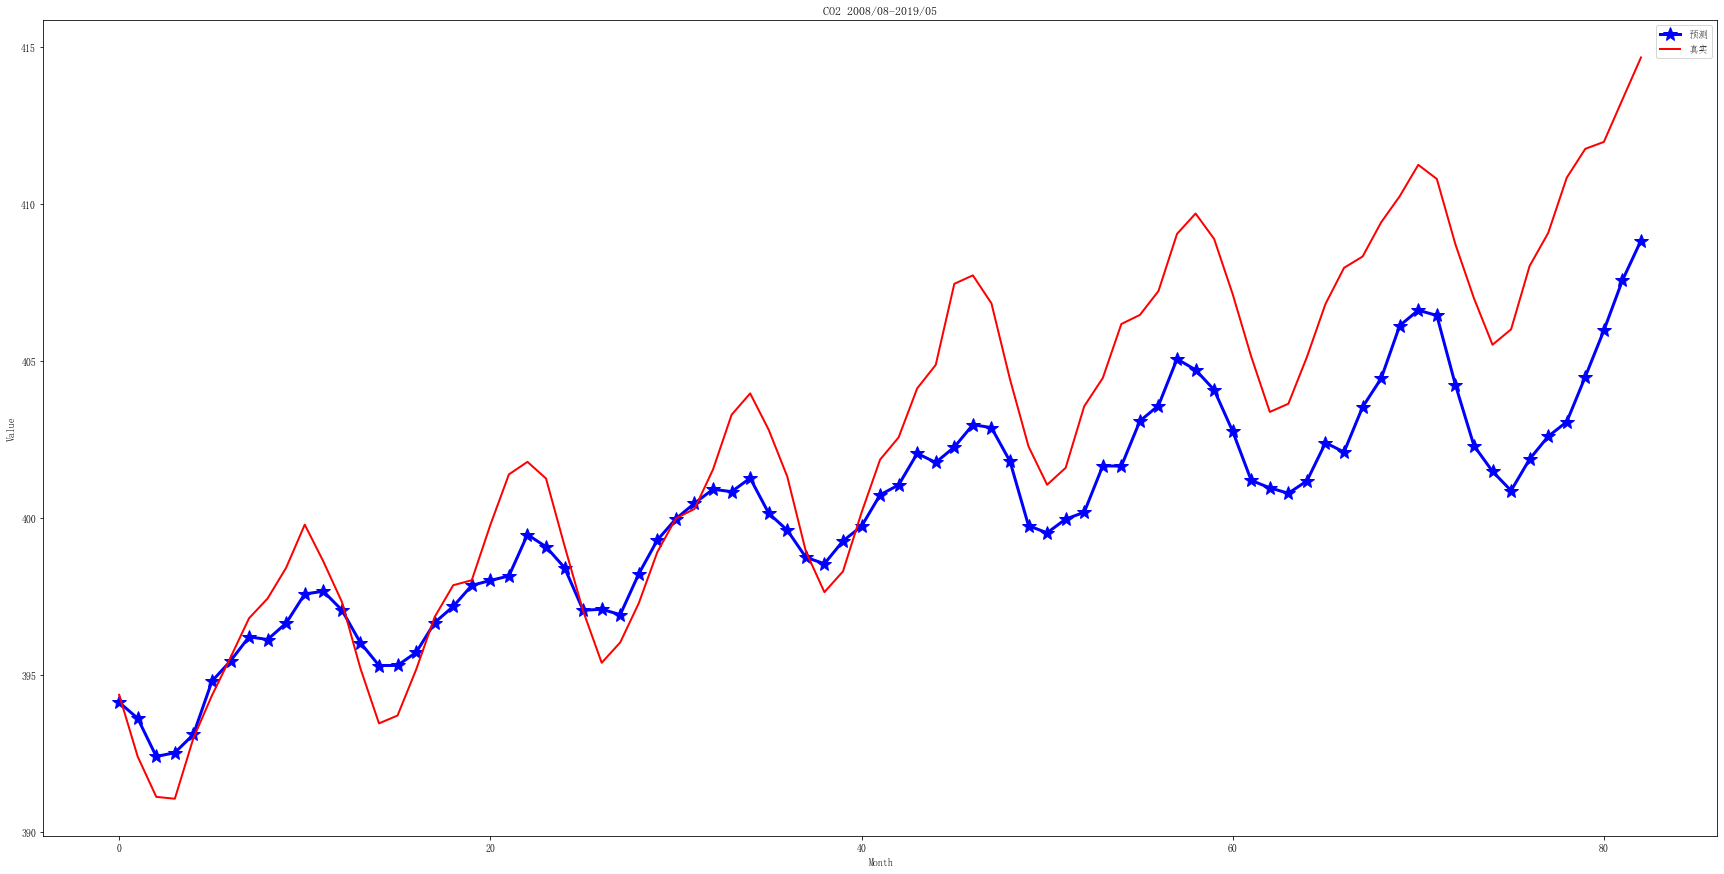

Test RMSE: 24.316


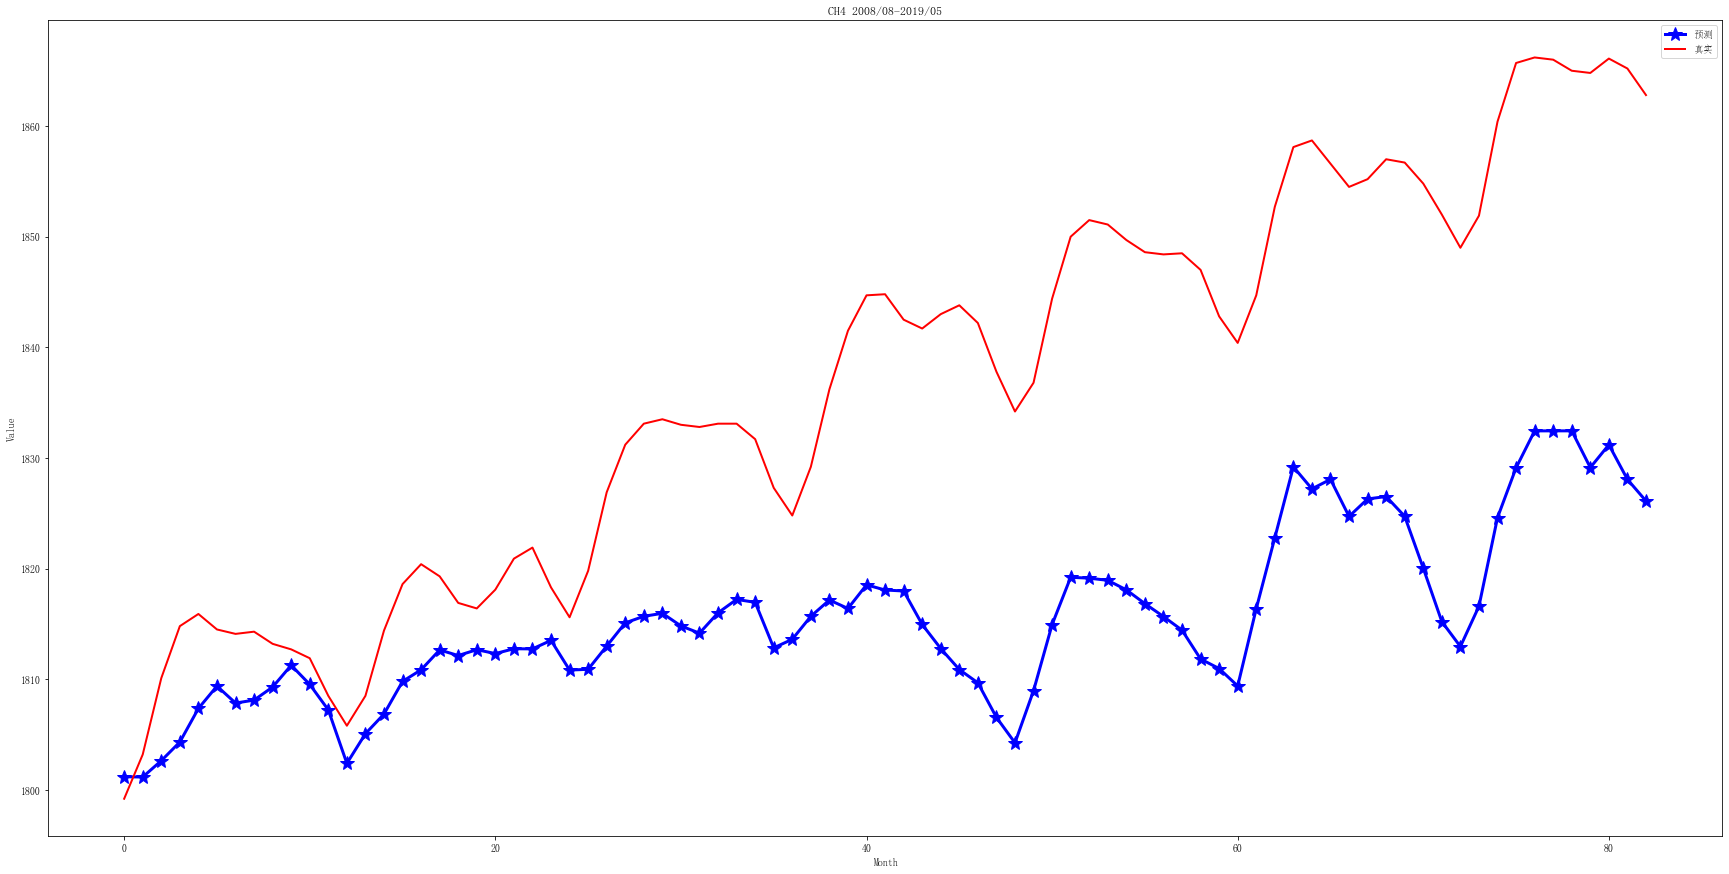

Test RMSE: 0.365


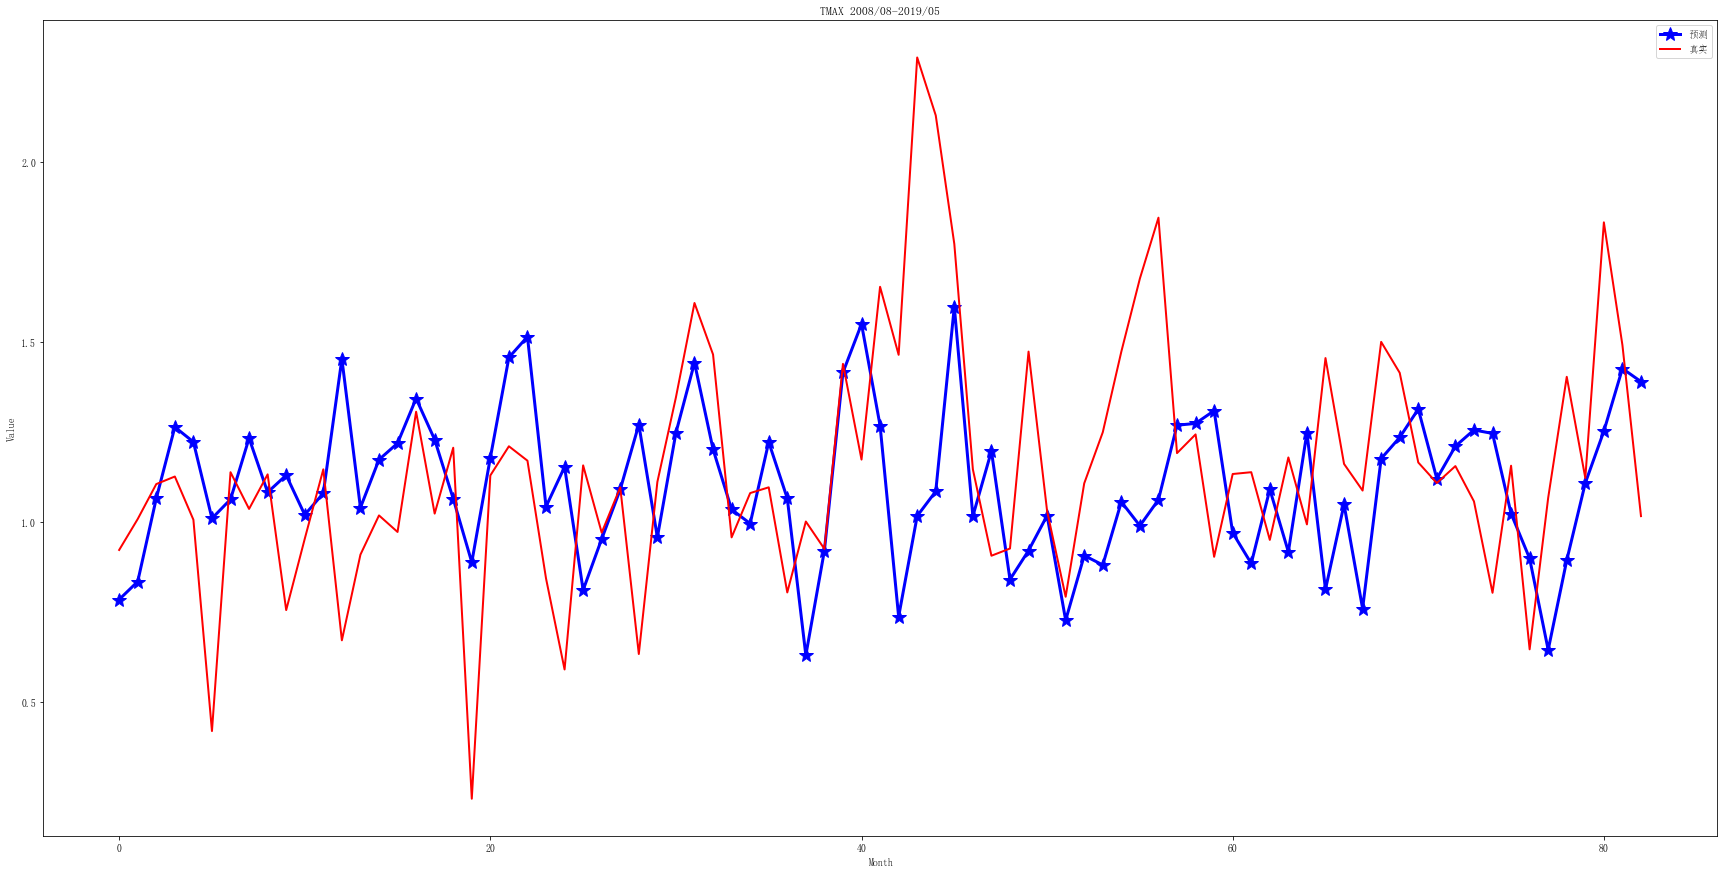

Test RMSE: 0.349


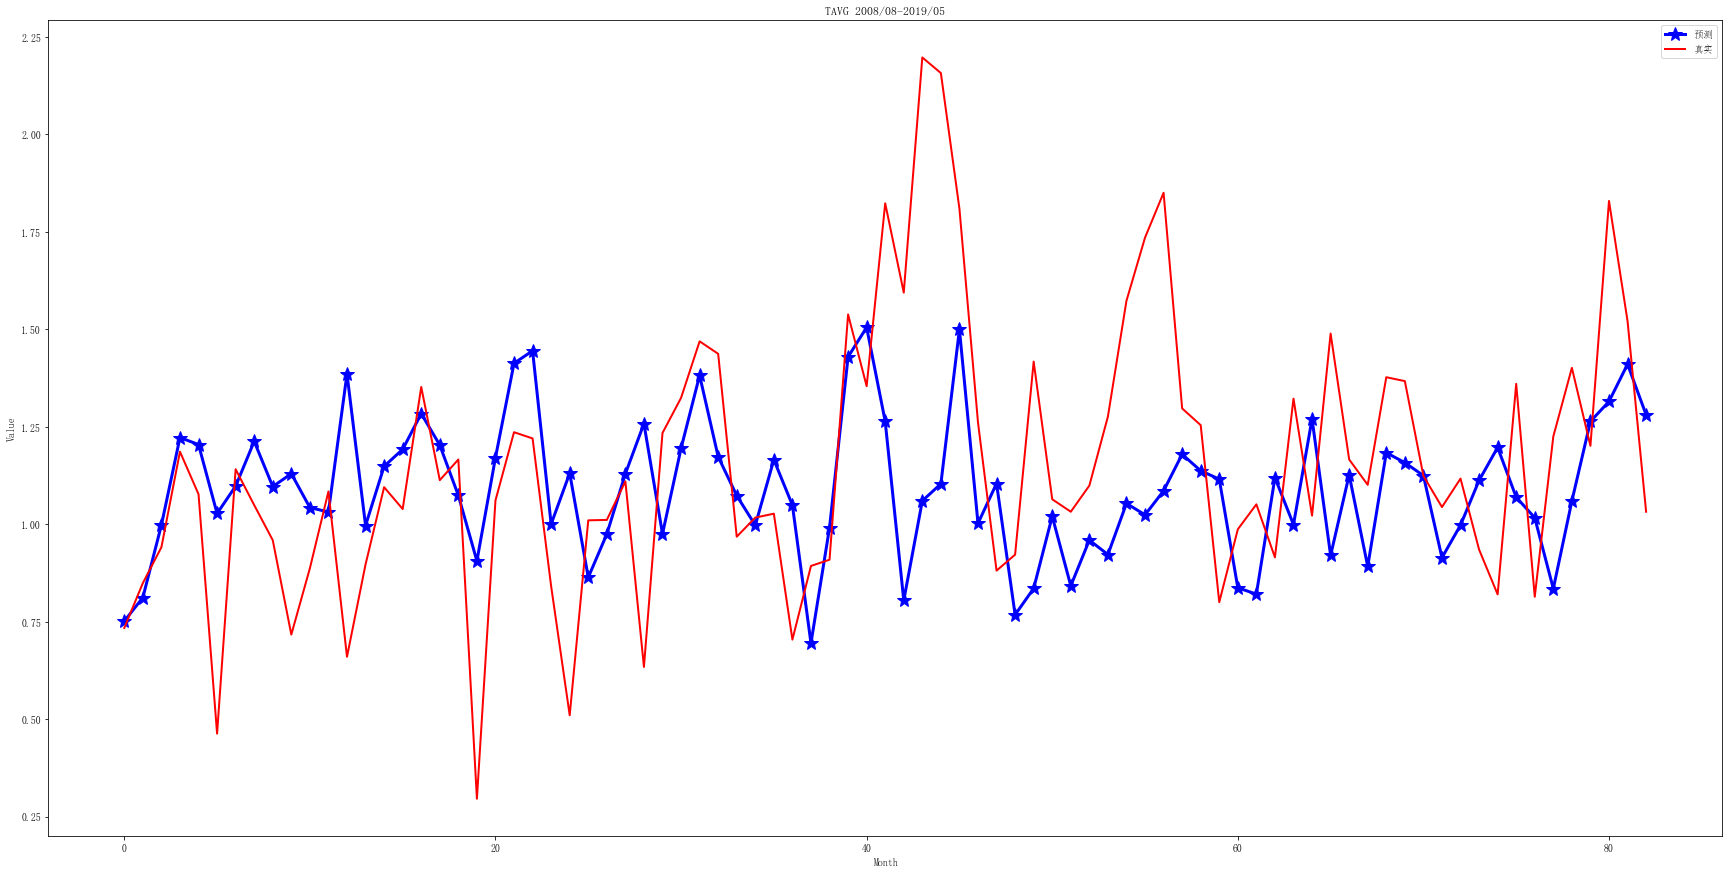

Test RMSE: 0.365


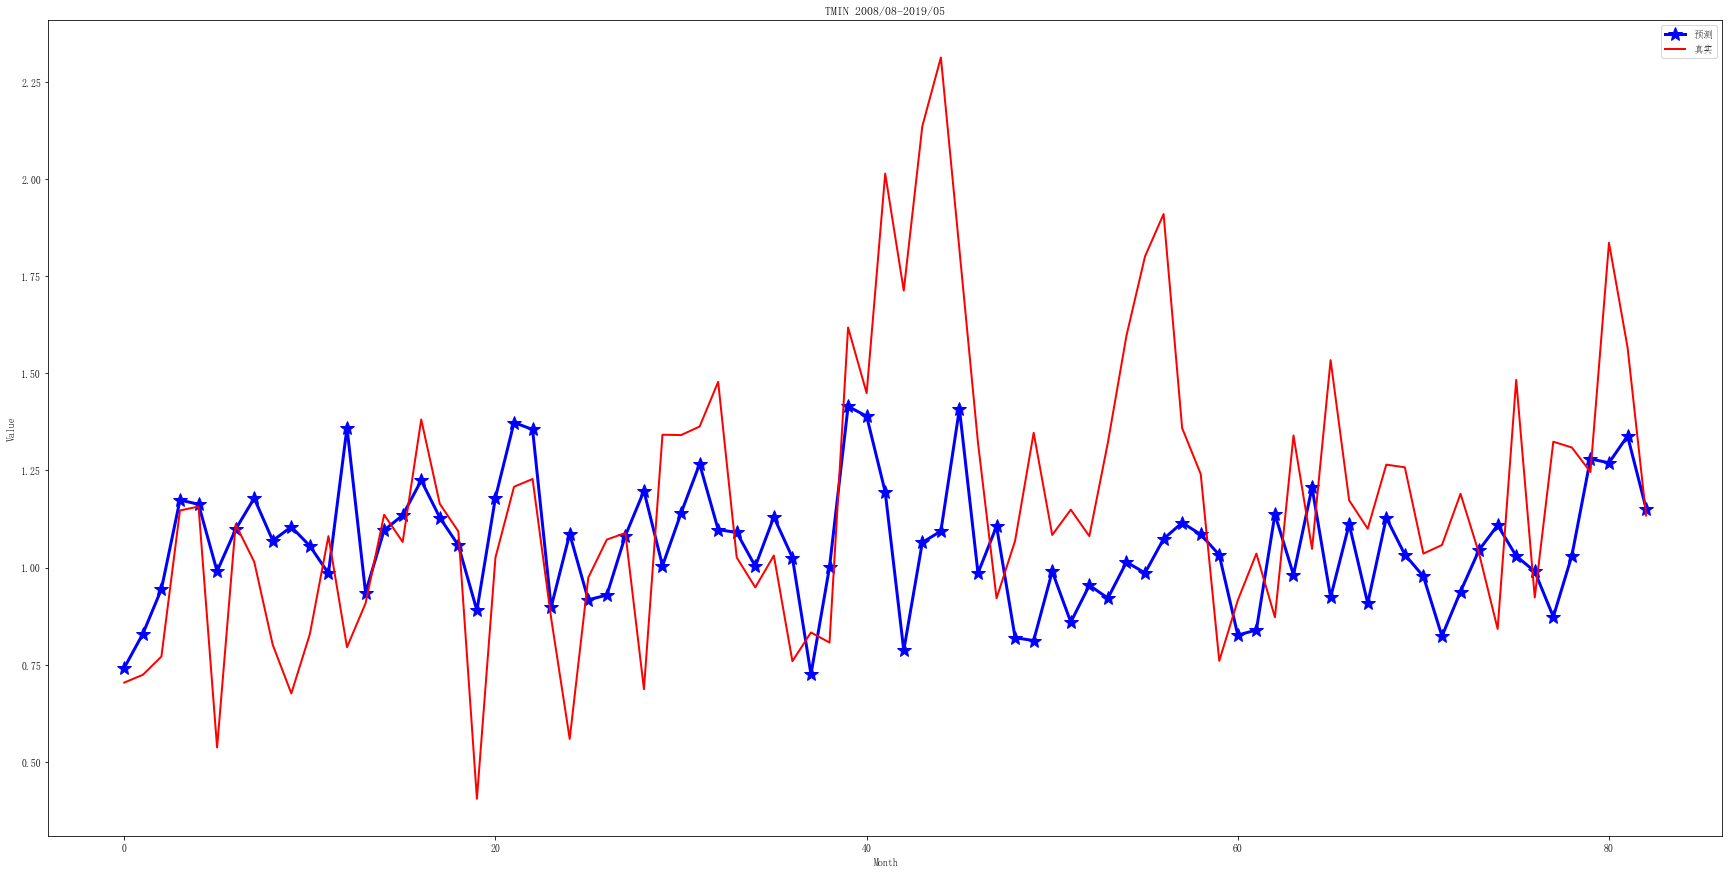

Test RMSE: 0.192


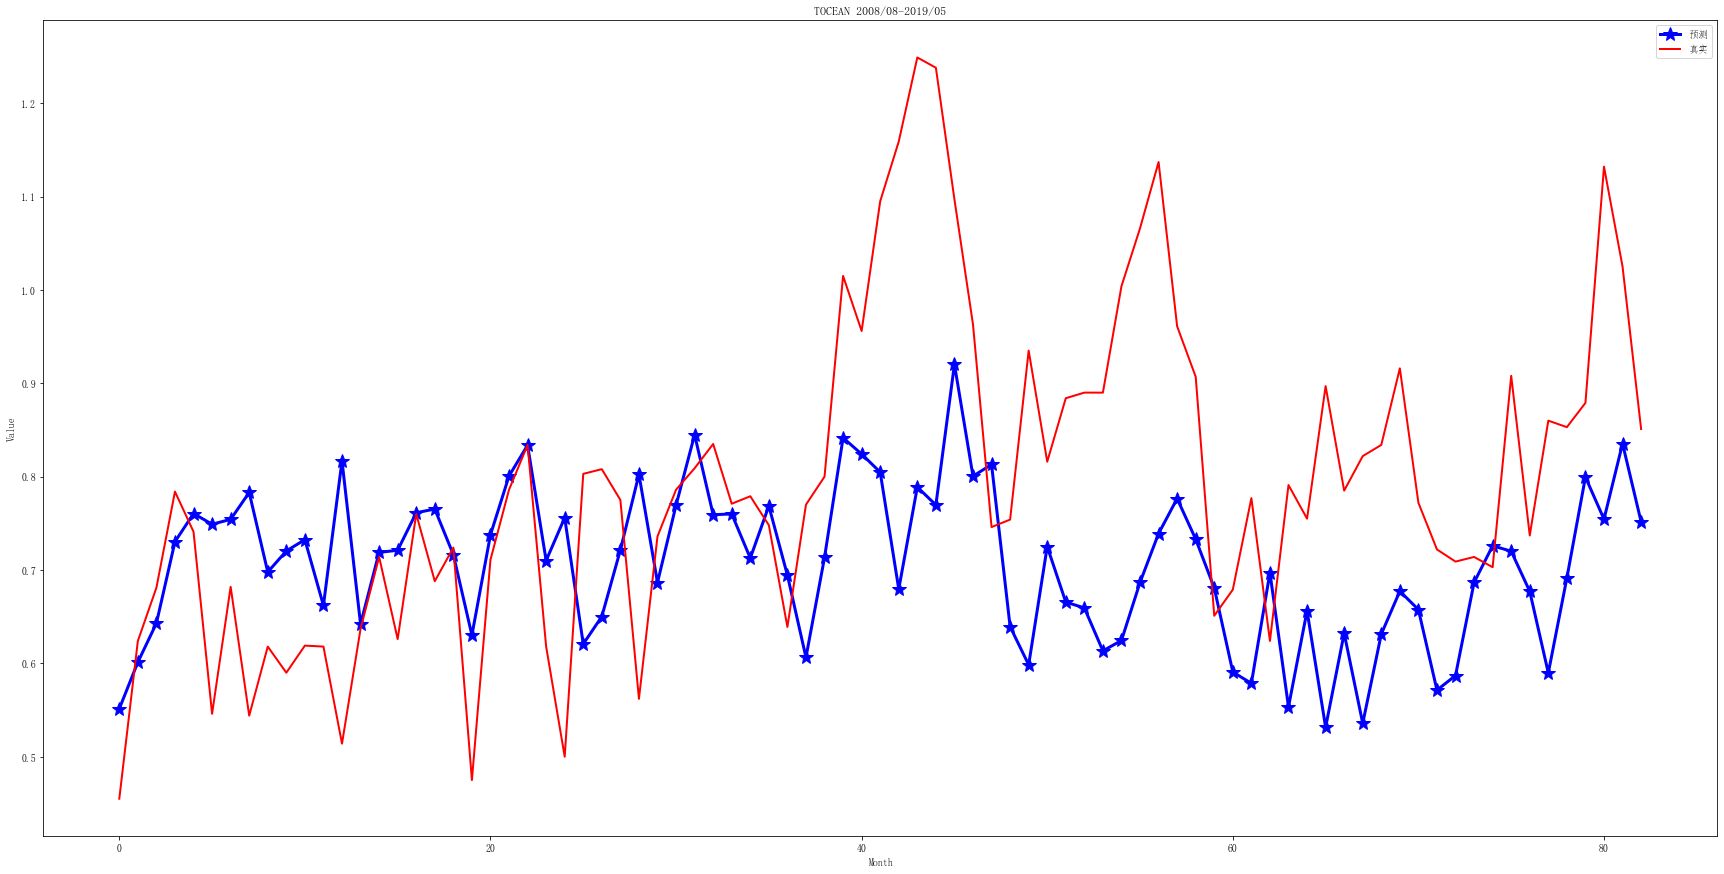

In [6]:
# 绘制历史数据和预测数据图
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
for i in groups:
    rmse = sqrt(mean_squared_error(inv_yhat[:,i-1], inv_y[:,i-1]))
    print('Test RMSE: %.3f' % rmse)

    fig= pyplot.figure(figsize = (30,15))
    plt.plot(inv_yhat[:,i-1],label='预测',c='b',linestyle='-', marker='*',linewidth=3,ms=15)
    plt.plot(inv_y[:,i-1],label="真实",c='r',linewidth=2,ms=5)
    plt.legend()
    plt.title('{} 2008/08-2019/05'.format(dataset.columns[i]))
    plt.xlabel("Month")
    plt.ylabel("Value")
    plt.savefig('{}verify.png'.format(dataset.columns[i]))
    
    plt.show()
    # 计算RMSE





In [7]:
#预测未来25年
alltime=12*25
# test_25=test_X[-1:,:]
# print(test_25)

pred_x=test_y[-n_in:,:].reshape(1,1,n_in*feature)
print(pred_x.shape)
import copy

# print(pred_y[-1,:].shape)
pred_y=np.zeros((1,feature))
for i in range(alltime):
    tmp=model.predict(pred_x)
    pred_x[0,0,:-feature]=pred_x[0,0,feature:]
    pred_x[0,0,-feature:]=copy.deepcopy(tmp[0,:])
#     print(pred_y.shape,tmp.shape)
    pred_y=np.vstack((pred_y,copy.deepcopy(tmp)))
    
pred_y=pred_y[1:,:]
print(pred_y.shape)
print(pred_y)
    

#     pre=pre.reshape(1,1,(pre.shape[-1]))
#     pred_y=np.vstack((pred_y,pre))
    

(1, 1, 288)
(300, 6)
[[0.91343898 0.81588173 0.56888252 0.53392869 0.46665114 0.52967829]
 [0.8878966  0.80087143 0.6228838  0.58495331 0.54044527 0.57994288]
 [0.8594774  0.81465131 0.61295474 0.58290488 0.52285147 0.58765244]
 ...
 [0.89198065 0.84643114 0.65420628 0.65260345 0.58965611 0.63418567]
 [0.89944023 0.8434034  0.64758527 0.641698   0.5735172  0.63190246]
 [0.89959693 0.83703208 0.61692452 0.61186254 0.54382426 0.60648829]]


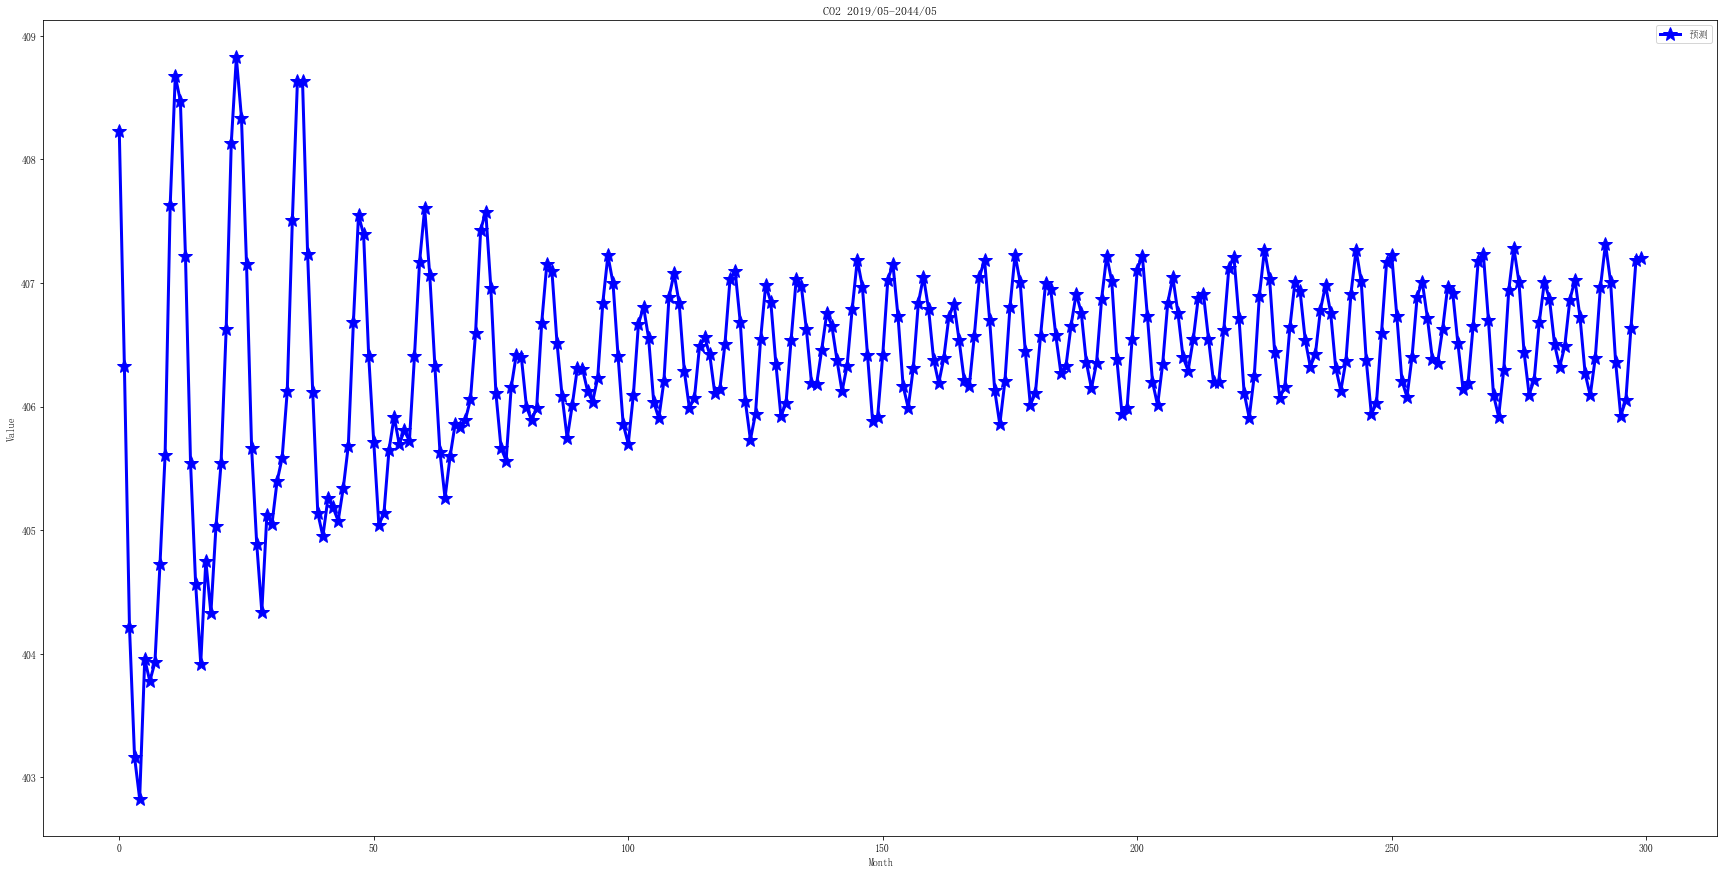

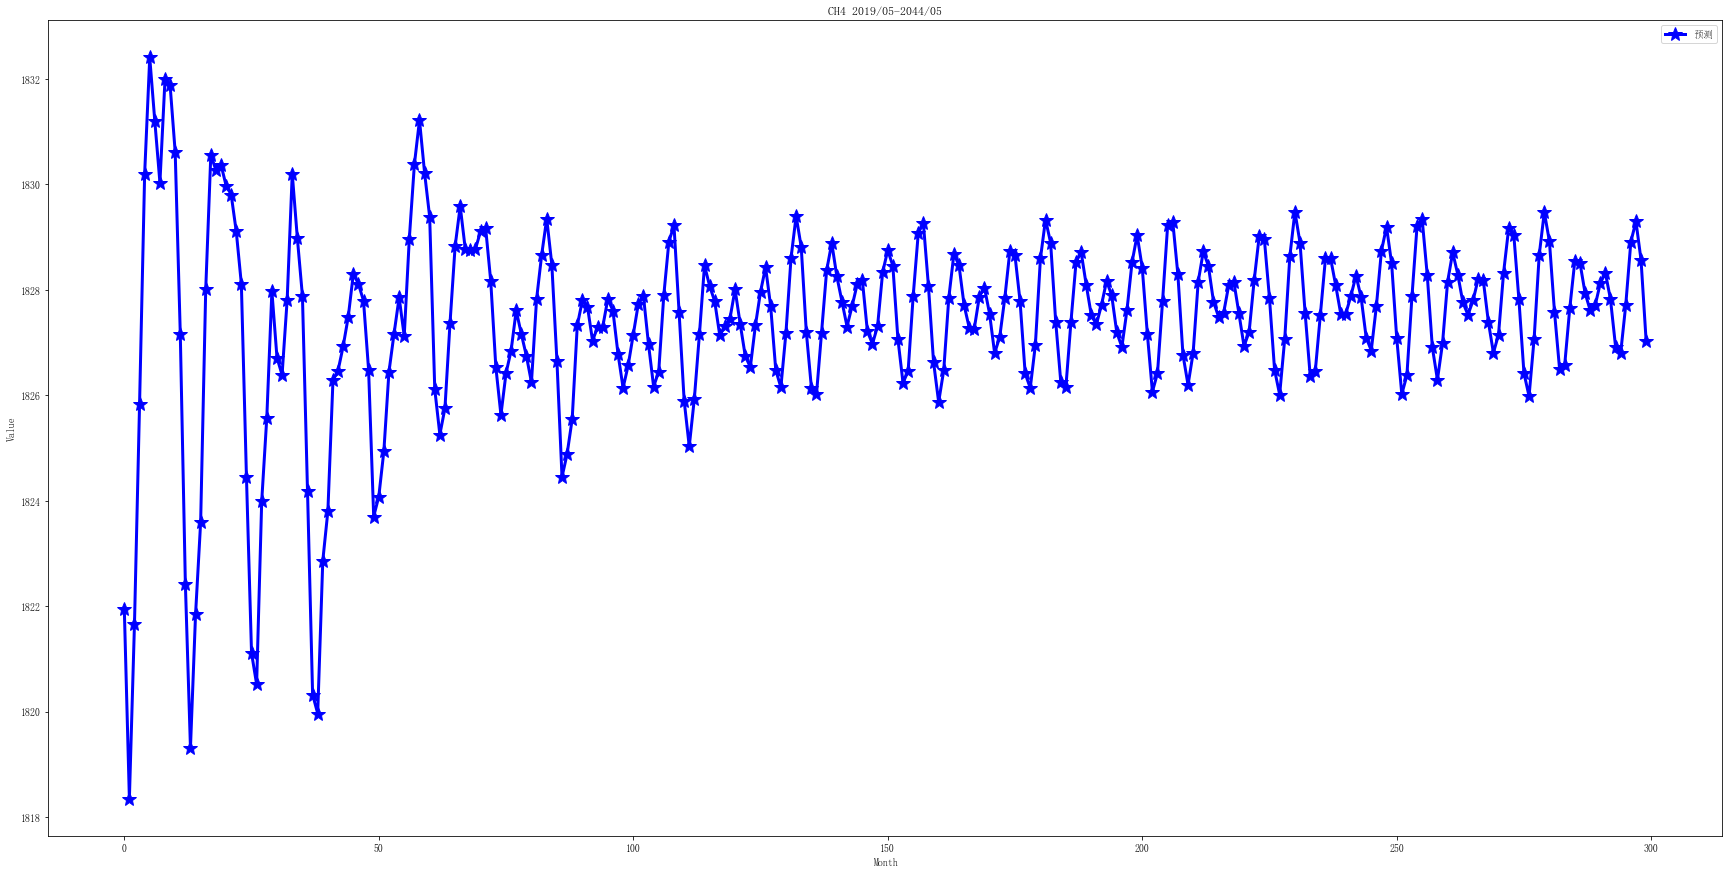

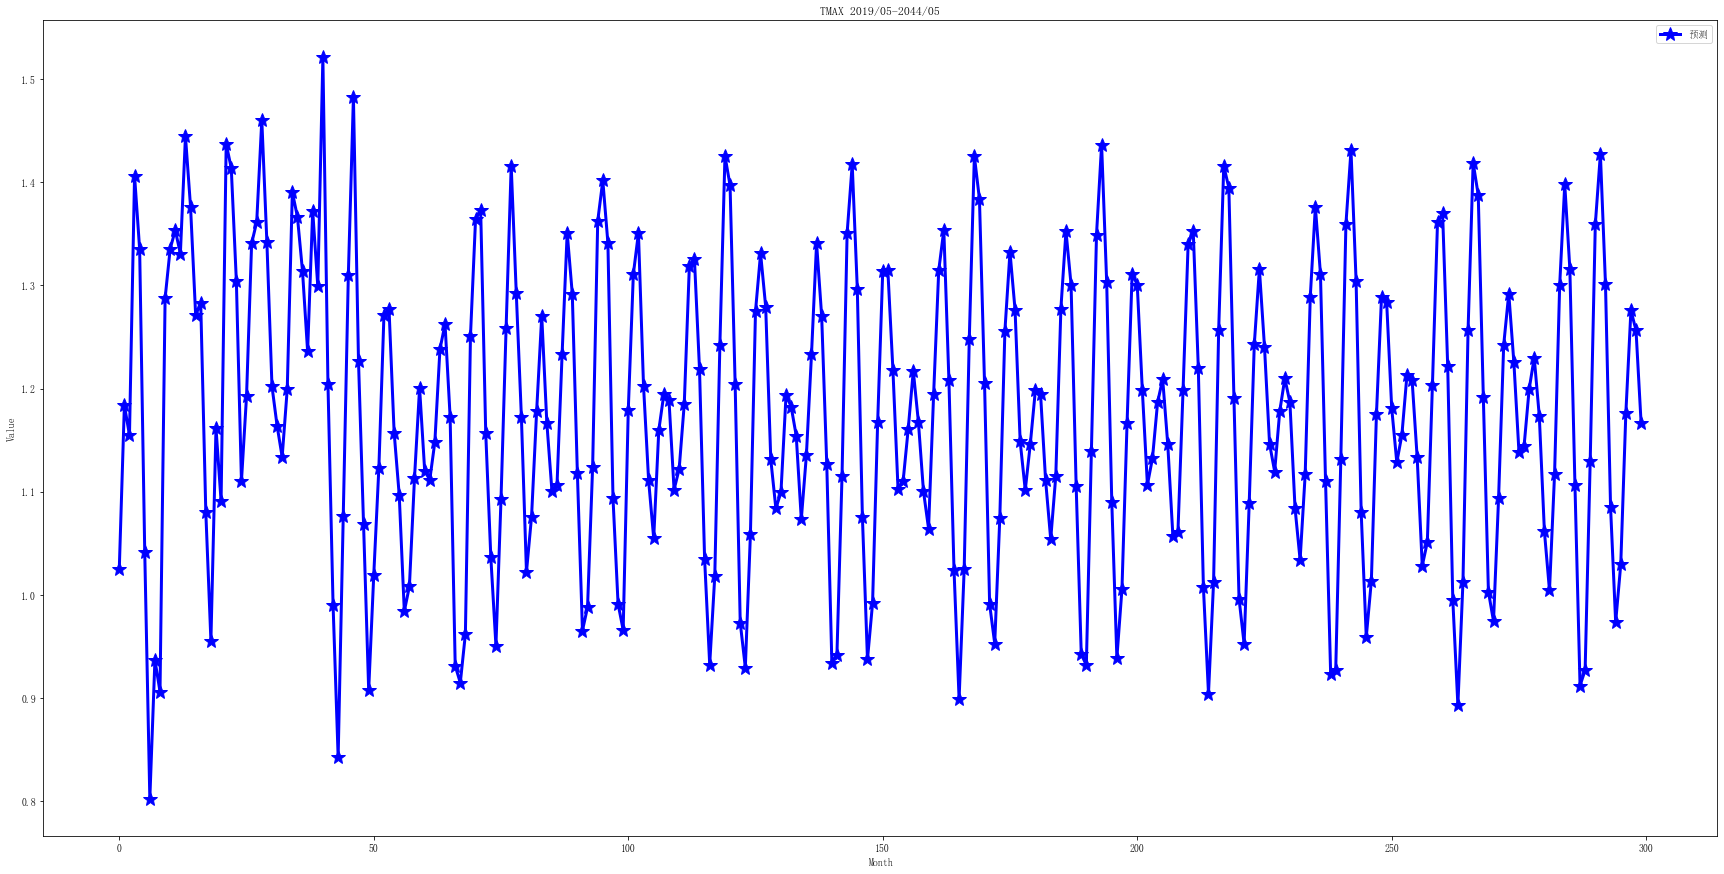

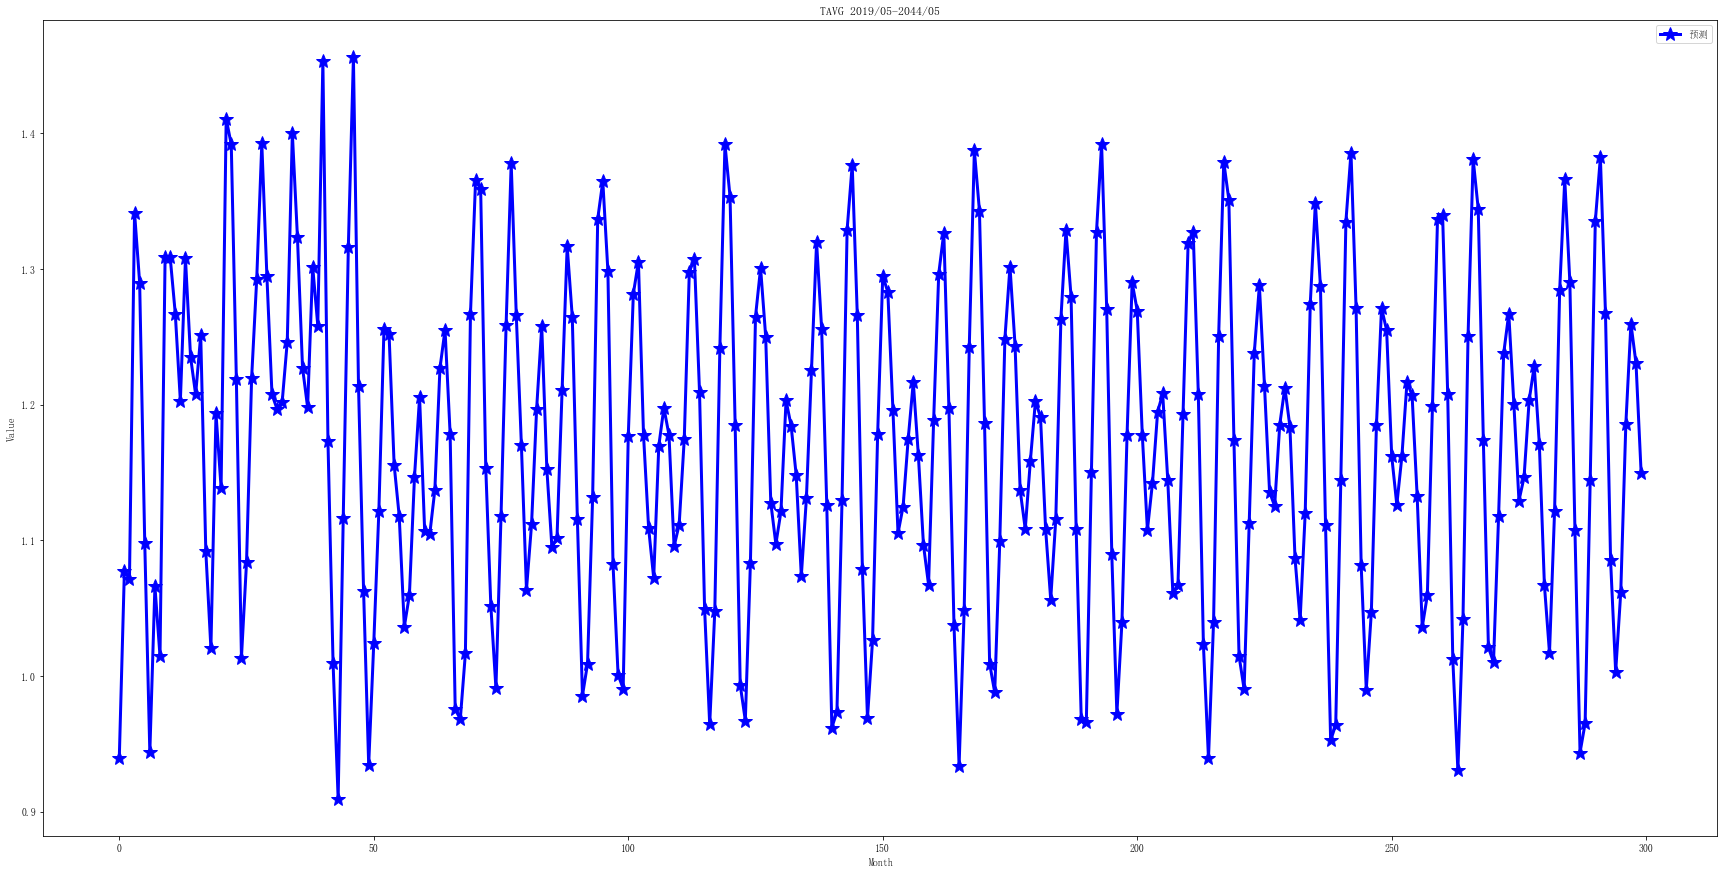

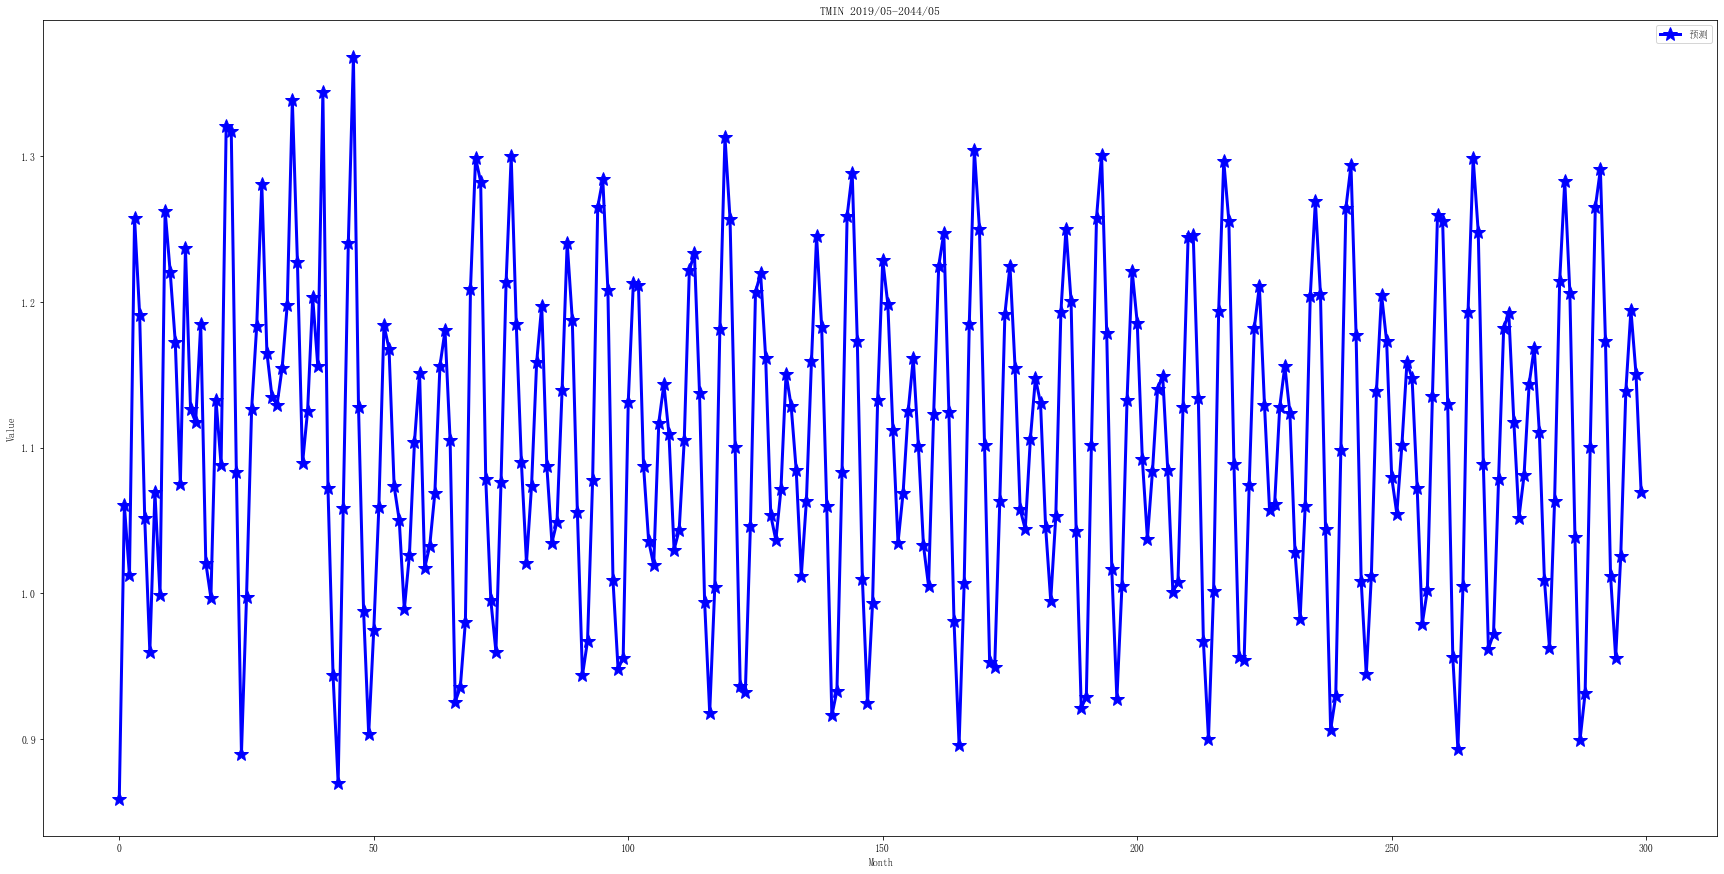

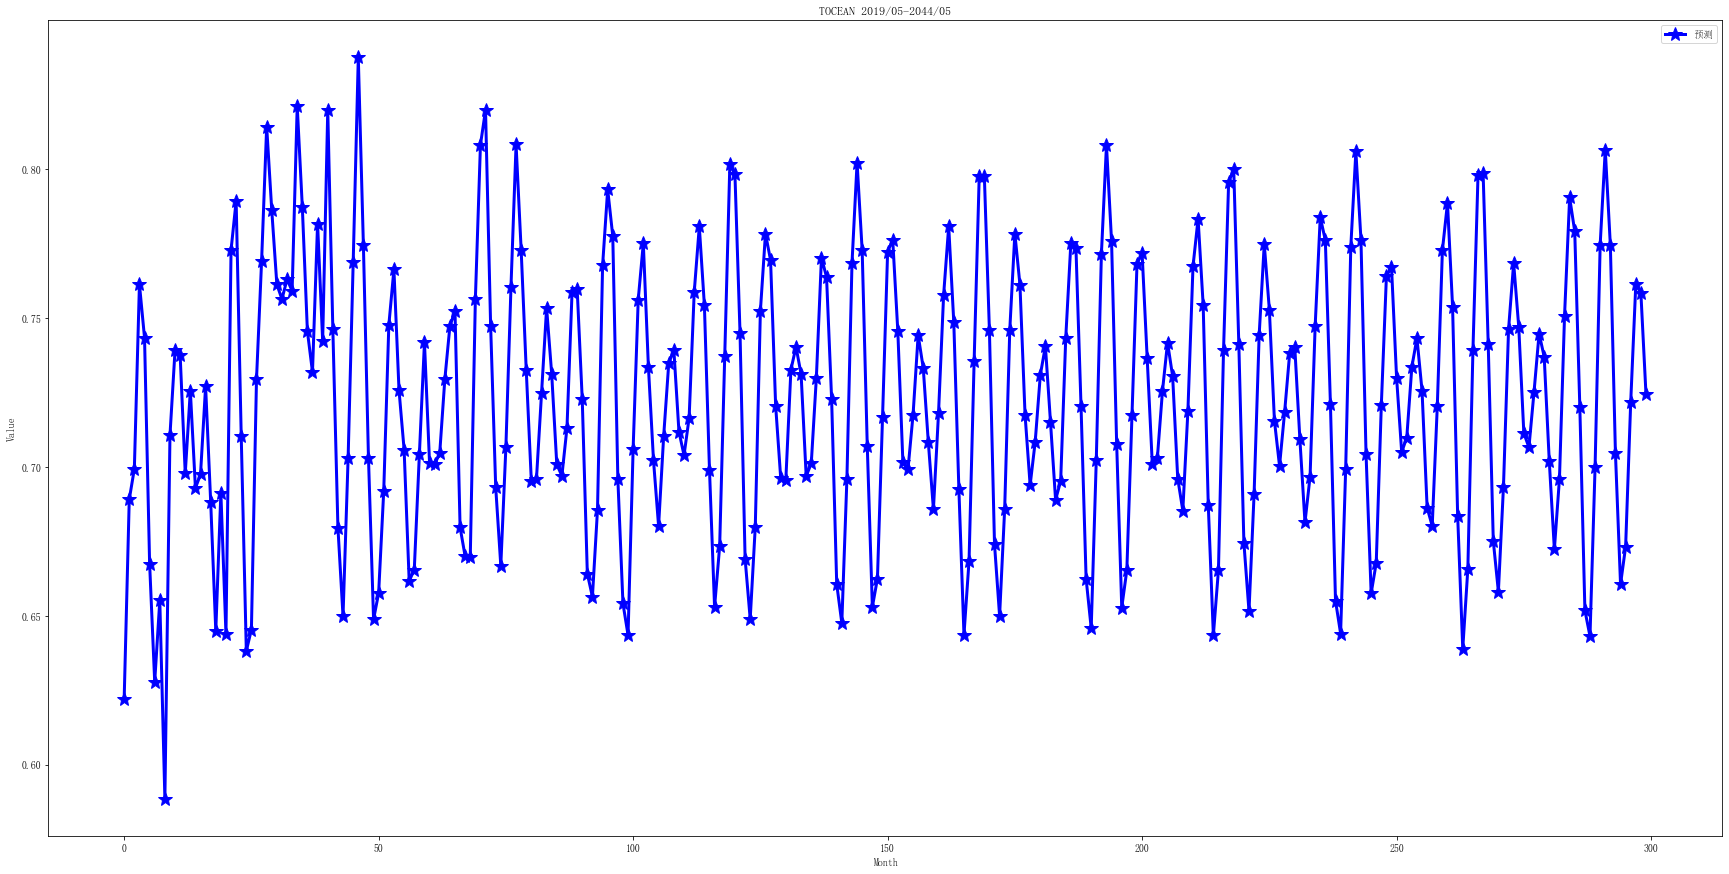

In [8]:


inv_pred_y = scaler.inverse_transform(pred_y)

for i in groups:
    # 绘制历史数据和预测数据图
    fig= pyplot.figure(figsize = (30,15))
    plt.plot(inv_pred_y[:,i-1],label='预测',c='b',linestyle='-', marker='*',linewidth=3,ms=15)
    plt.legend()
    plt.title('{} 2019/05-2044/05'.format(dataset.columns[i]))
    plt.xlabel("Month")
    plt.ylabel("Value")
    plt.savefig('{}25year.png'.format(dataset.columns[i]))
    plt.show()
    # 计算RMSE
